In [ ]:
'''
EX NO:09                         K-MEANS CLUSTERING
DATE : 18-03-2024

Aim:

To demonstrate the K-Means Clustering Algorithm for data science
applications

Description :

K-means clustering algorithm computes the centroids and iterates until we it
finds optimal centroid. The number of clusters identified from data by algorithm is
represented by ‘K’ in K-means. In this algorithm, the data points are assigned to a
cluster in such a manner that the sum of the squared distance between the data
points and centroid would be minimum. It is to be understood that less variation
within the clusters will lead to more similar data points within same cluster.

In [ ]:
#URK22AI1048
import matplotlib .pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, davies_bouldin_score
data= pd.read_csv('/content/iris.data.csv')


In [ ]:
# Load the Iris dataset
#URK22AI1048
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']]
X


,sepal length (cm),sepal width (cm),petal length (cm)
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4
...,...,...,...
145,6.7,3.0,5.2
146,6.3,2.5,5.0
147,6.5,3.0,5.2
148,6.2,3.4,5.4


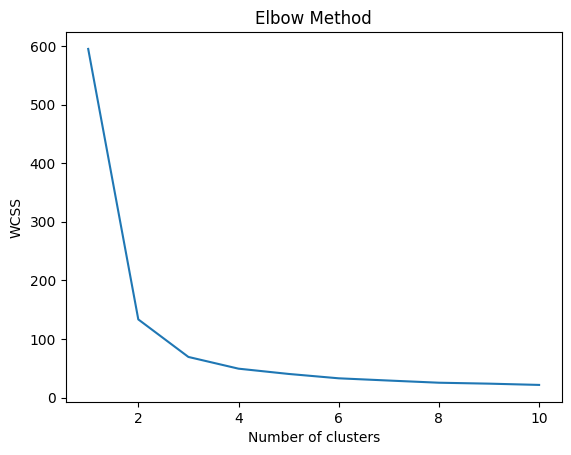

In [ ]:
# Implementing the Elbow Method to find the optimal K
#URK22AI1048
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Create the K-means model with optimal K (3 clusters)
#URK22AI1048
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)


KMeans(n_clusters=4, n_init=10, random_state=0)

In [ ]:
# Validate the performance of the classifier
#URK22AI1048
silhouette = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.5083197879231267
Davies-Bouldin Index: 0.7114330020643582


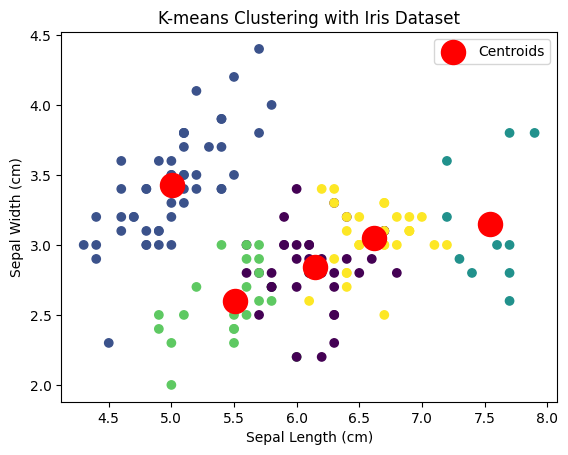

In [ ]:
# Visualize the clusters with centroids
#URK22AI1048
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering with Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()